<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo2_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise dos valores de procedimetnos do Data SUS 

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format


In [2]:
# configurando cores de fundo dos gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'

In [3]:
# preparando a base: lendo arquivo, incluindo região e ajustando nome dos estados
# importando os números
dados = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/Aprendendo/master/A165345189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
# criando o campo do códgio da região
dados["Cod_Região"]=dados["Unidade da Federação"].str[0]
# inclui os nomes das regiões
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")
# inclui os nomes das regiões em dados
dados = dados.join(Base_regioes, on="Cod_Região")
# retirando os números de antes do nome dos estados
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace("\d+", "")
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.strip()
#verificando a marcação de Região
dados[["Região","Unidade da Federação","Total"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região,Unidade da Federação,Total
0,Norte,Rondônia,"1,073,782,138.81"
1,Norte,Acre,"475,290,315.34"
2,Norte,Amazonas,"2,041,003,727.86"
3,Norte,Roraima,"349,395,453.66"
4,Norte,Pará,"4,950,135,530.02"
5,Norte,Amapá,"326,885,943.09"
6,Norte,Tocantins,"1,109,478,655.20"
7,Nordeste,Maranhão,"4,120,818,450.35"
8,Nordeste,Piauí,"2,426,540,822.88"
9,Nordeste,Ceará,"7,018,565,512.36"


In [4]:
#selecionando as colunas
# selecionando apenas colunas com valores para todas as linhas
col_usaveis = dados.mean().index.tolist()
# adicionando coluna não numérica com os titulos das linhas
col_usaveis.insert(0, "Unidade da Federação")
# excluindo a coluna TOTAL e Cod_Região
del col_usaveis[-2:]
# excluindo colunas iniciais com valores distorcidos
del col_usaveis[1:7]
# confirmando se realmente foram excluidas
# col_usaveis[-5:]
col_usaveis[:5]

['Unidade da Federação', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai']

In [5]:
# criando a série do último mês disponível e ordena por valor
base_usavel = dados[col_usaveis] # pega apenas as colunas completas
base_usavel = base_usavel.set_index("Unidade da Federação") # define o index dessa nova base
ultimoMes = base_usavel.iloc[:,-1:] # cria a série pegando apenas o último mês
ultimoMes = ultimoMes.sort_values(by=ultimoMes.columns[0], ascending=False) # ordena pelo valor do mês
# validações
# ultimoMes.tail()
ultimoMes.head()

,2021/Jul
Unidade da Federação,
São Paulo,"305,314,678.98"
Minas Gerais,"154,160,802.91"
Paraná,"102,067,382.02"
Rio Grande do Sul,"88,897,808.64"
Rio de Janeiro,"86,682,141.36"


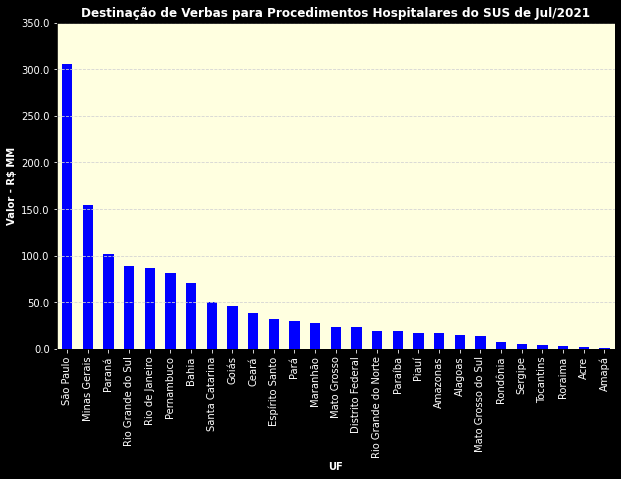

In [6]:
# Construindo grafico dos 5 estados com maior valor
ax = ultimoMes.plot(figsize=(10,6), kind="bar", legend=False, color ="b")
ax.set_facecolor("lightyellow")
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))

ax.set_ylim(0, 350*escalaY) # definindo limites do eixo y
ax.yaxis.grid(color='lightgrey', linestyle="--") # incluindo a linha no eixo y
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("UF", fontweight="bold", color="white")
plt.title("Destinação de Verbas para Procedimentos Hospitalares do SUS de Jul/2021", fontweight="bold", color="white")
plt.show()


In [7]:
populacao = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", 
                                      match="Unidade federativa")
populacao = populacao[0]
populacao = populacao.rename(columns={"Unidade federativa":"uf","População":"populacao"})
populacao = populacao.set_index("uf")
populacao = populacao.filter(regex="populacao")
populacao["populacao"] = populacao["populacao"].str.replace(" ","").astype(int)
populacao.index = populacao.index.str.strip()

display(populacao.head())
populacao.info()

,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia,14985284
Paraná,11597484


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


In [8]:
unida = populacao.join(ultimoMes)
unida

,populacao,2021/Jul
uf,,
São Paulo,46649132,"305,314,678.98"
Minas Gerais,21411923,"154,160,802.91"
Rio de Janeiro,17463349,"86,682,141.36"
Bahia,14985284,"70,232,597.61"
Paraná,11597484,"102,067,382.02"
Rio Grande do Sul,11466630,"88,897,808.64"
Pernambuco,9674793,"80,912,918.86"
Ceará,9240580,"38,293,086.33"
Pará,8777124,"30,176,865.99"


In [9]:
def trata_base_populacao(base_tratar):
  base_tratar = base_tratar.rename(columns={"Unidade federativa":"uf","População":"populacao"})
  base_tratar = base_tratar.set_index("uf")
  populacao = base_tratar.filter(regex="populacao").copy()
  populacao["populacao"] = populacao["populacao"].str.replace(" ","").astype(int)
  populacao.index = populacao.index.str.strip()
  unida = populacao.join(ultimoMes)
  return (populacao, unida)

In [10]:
base_pop = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", 
                                      match="Unidade federativa")
população, unida = trata_base_populacao (base_pop[0])
display(população.head())
display(unida.head())

,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia,14985284
Paraná,11597484


,populacao,2021/Jul
uf,,
São Paulo,46649132,"305,314,678.98"
Minas Gerais,21411923,"154,160,802.91"
Rio de Janeiro,17463349,"86,682,141.36"
Bahia,14985284,"70,232,597.61"
Paraná,11597484,"102,067,382.02"


In [11]:
unida["gastos"] = unida["2021/Jul"]

In [12]:
import seaborn as sns

In [13]:
unida["gastos por habitante"] = unida["gastos"]/unida["populacao"]

In [14]:
unida.head()

,populacao,2021/Jul,gastos,gastos por habitante
uf,,,,
São Paulo,46649132,"305,314,678.98","305,314,678.98",6.54
Minas Gerais,21411923,"154,160,802.91","154,160,802.91",7.20
Rio de Janeiro,17463349,"86,682,141.36","86,682,141.36",4.96
Bahia,14985284,"70,232,597.61","70,232,597.61",4.69
Paraná,11597484,"102,067,382.02","102,067,382.02",8.80


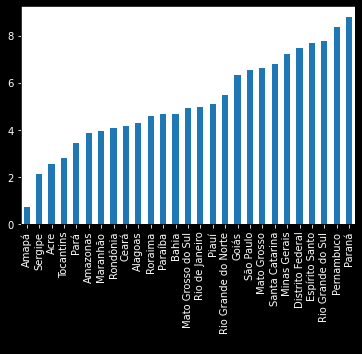

In [15]:
def plot_ordenado (base, ordenar, apresentar):
  base.sort_values(by=ordenar, inplace=True)
  base[apresentar].plot(kind="bar")

plot_ordenado(unida,"gastos por habitante","gastos por habitante")

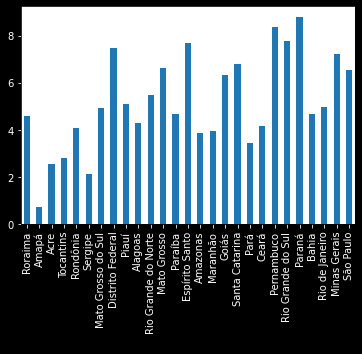

In [16]:
plot_ordenado(unida,"populacao","gastos por habitante")

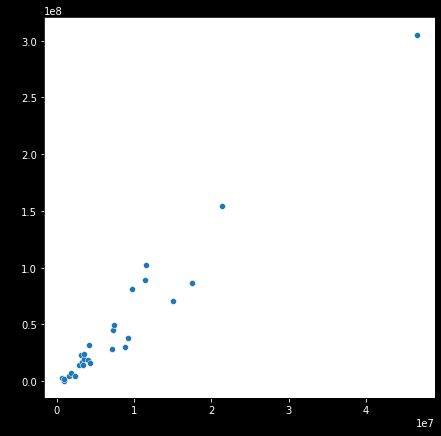

In [17]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=unida, x="populacao", y="gastos")

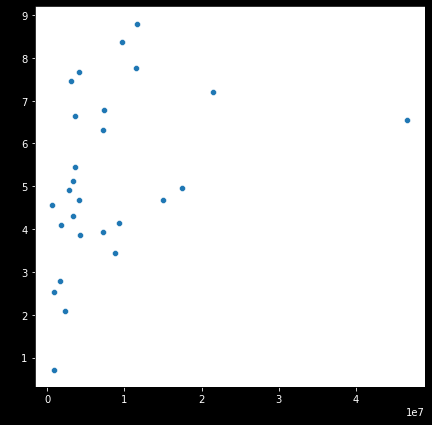

In [18]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=unida, x="populacao", y="gastos por habitante")

In [19]:
mesAnterior = base_usavel[base_usavel.columns[-2:-1]]
mesAnterior.head()

,2021/Jun
Unidade da Federação,
Rondônia,"12,586,384.26"
Acre,"3,458,187.11"
Amazonas,"20,503,366.04"
Roraima,"3,350,272.96"
Pará,"41,805,551.16"


In [20]:
unidas = unida.join(mesAnterior)
unidas.head()

,populacao,2021/Jul,gastos,gastos por habitante,2021/Jun
uf,,,,,
Roraima,652713,"2,977,820.70","2,977,820.70",4.56,"3,350,272.96"
Amapá,877613,"632,906.09","632,906.09",0.72,"1,986,903.84"
Acre,906876,"2,302,711.01","2,302,711.01",2.54,"3,458,187.11"
Tocantins,1607363,"4,466,982.19","4,466,982.19",2.78,"6,308,189.85"
Rondônia,1815278,"7,427,454.01","7,427,454.01",4.09,"12,586,384.26"


In [21]:
unidas.rename(columns={"2021/Jul":"Gastos_Jul/21","2021/Jun":"Gastos_Jun/21","gastos por habitante":"gastos_por_habit_Jul/21"}, inplace=True)
unidas.head()

,populacao,Gastos_Jul/21,gastos,gastos_por_habit_Jul/21,Gastos_Jun/21
uf,,,,,
Roraima,652713,"2,977,820.70","2,977,820.70",4.56,"3,350,272.96"
Amapá,877613,"632,906.09","632,906.09",0.72,"1,986,903.84"
Acre,906876,"2,302,711.01","2,302,711.01",2.54,"3,458,187.11"
Tocantins,1607363,"4,466,982.19","4,466,982.19",2.78,"6,308,189.85"
Rondônia,1815278,"7,427,454.01","7,427,454.01",4.09,"12,586,384.26"


In [22]:
unidas["gastos_por_habit_Jun/21"] = unidas["Gastos_Jun/21"]/unidas["populacao"]
unidas.head()

,populacao,Gastos_Jul/21,gastos,gastos_por_habit_Jul/21,Gastos_Jun/21,gastos_por_habit_Jun/21
uf,,,,,,
Roraima,652713,"2,977,820.70","2,977,820.70",4.56,"3,350,272.96",5.13
Amapá,877613,"632,906.09","632,906.09",0.72,"1,986,903.84",2.26
Acre,906876,"2,302,711.01","2,302,711.01",2.54,"3,458,187.11",3.81
Tocantins,1607363,"4,466,982.19","4,466,982.19",2.78,"6,308,189.85",3.92
Rondônia,1815278,"7,427,454.01","7,427,454.01",4.09,"12,586,384.26",6.93


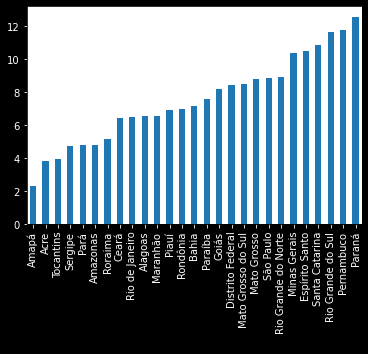

In [23]:
plot_ordenado(unidas,"gastos_por_habit_Jun/21","gastos_por_habit_Jun/21")

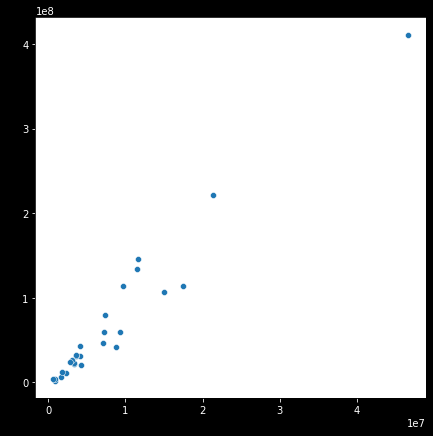

In [24]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=unidas, x="populacao", y="Gastos_Jun/21")

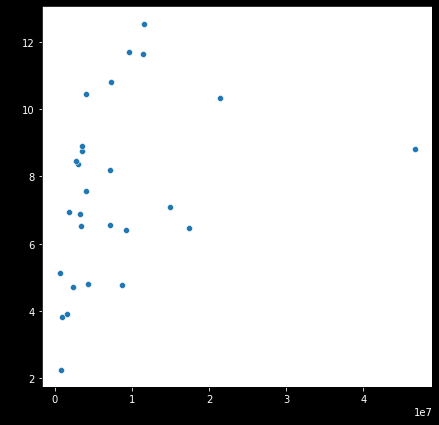

In [25]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=unidas, x="populacao", y="gastos_por_habit_Jun/21")

In [26]:
baseMeses = unidas.melt(id_vars="populacao", value_vars=["Gastos_Jun/21","Gastos_Jul/21"])
baseMeses.head()

,populacao,variable,value
0,877613,Gastos_Jun/21,"1,986,903.84"
1,906876,Gastos_Jun/21,"3,458,187.11"
2,1607363,Gastos_Jun/21,"6,308,189.85"
3,2338474,Gastos_Jun/21,"11,012,790.28"
4,8777124,Gastos_Jun/21,"41,805,551.16"


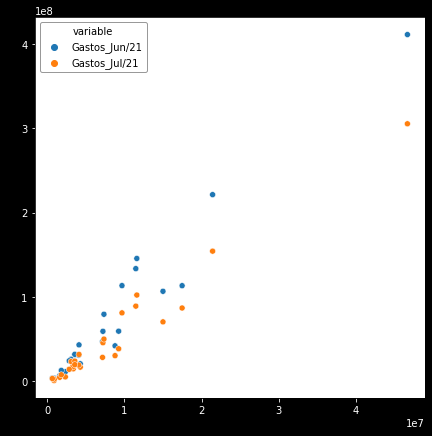

In [27]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=baseMeses, x="populacao", y="value", hue="variable")

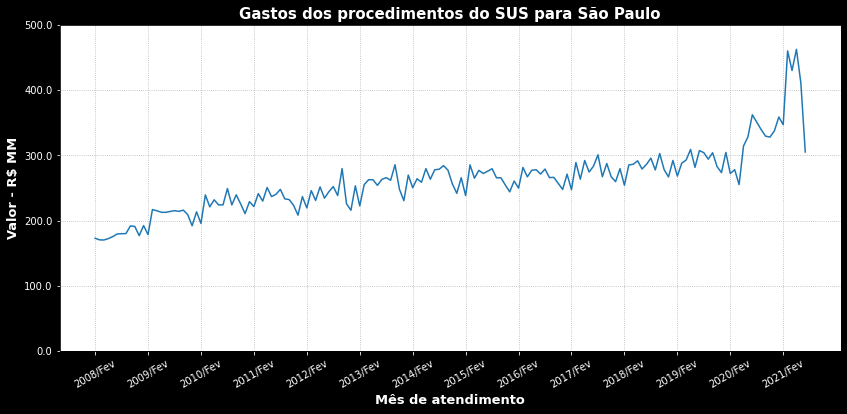

In [30]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=base_usavel.T, x=base_usavel.T.index, y="São Paulo")
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
plt.xticks(rotation=30)
plt.ylim(0,500*escalaY)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white", fontsize=13)
plt.xlabel("Mês de atendimento", fontweight="bold", color="white", fontsize=13)
plt.grid(linestyle=":")
plt.title("Gastos dos procedimentos do SUS para São Paulo", fontweight="bold", color="white", fontsize=15)
plt.show()